<a href="https://colab.research.google.com/github/mikeamerenda/mikeamerenda/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df =pd.read_csv('/content/sales_predictions.csv')
df.head()
# Source https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Cleaning**

In [2]:
#1) How many rows and columns?
df.shape

(8523, 12)

In [3]:
#2) What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
#3) Are there duplicates? If so, drop and duplicates.
df.duplicated().any()

False

In [5]:
#4) Identify Missing values.
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
null_item_weight =pd.isnull(df['Item_Weight'])
df[null_item_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [7]:
null_outlet_size =pd.isnull(df['Outlet_Size'])
df[null_outlet_size]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [8]:
df.drop(columns=['Item_Weight','Outlet_Size'], inplace=True)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


I decided to Drop the columns 'Item_Weight' and 'Outlet_Size' as both columns are missing a large amount of data and data missing is completley random without any outside source available to retrieve it

In [9]:
#6) Confirm that there are no missing values after addressing them.
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

All Missing Data has been removed

In [10]:
#7)Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
#Going through each columns (.value Counts) to see if changes are needed to fix inconsistencies
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCQ06     9
FDD38     9
NCB18     9
         ..
FDE52     1
DRF48     1
FDQ60     1
FDC23     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
#Has Consistency issues and needs to be fixed
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
#Making Variable in column to read Low Fat or Regular
df.loc[df['Item_Fat_Content']=='LF', 'Item_Fat_Content']='Low Fat'
df.loc[df['Item_Fat_Content']=='low fat', 'Item_Fat_Content']='Low Fat'
df.loc[df['Item_Fat_Content']=='reg', 'Item_Fat_Content']='Regular'

In [13]:
# Variables now only read 'Low Fat' or 'Regular'
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
#Looks okay
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [15]:
#Looks okay
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
#Looks okay
df['Item_MRP'].value_counts()

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

In [17]:
#Looks okay
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [18]:
#Looks okay
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [19]:
#Looks okay
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
#Looks okay
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

Only **Item_Fat_Content** needed to be fixed for inconsitency issues

In [21]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


Project 1 - Part 3 (Core)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

I have Created Histograms for 'Item Outlet Sales', 'Item Visibility', 'Item Type', 'Fat Content' and 'Outlet Establishment year'. I will use this data to show how Item Visibility affects Outlet Sales and how it affects sales of certain item types. 
- I will also see if the age of the establishment affects the Outlet Sales

Histogram to view the distributions of various features in your dataset.

Text(0, 0.5, 'Number of Outlets')

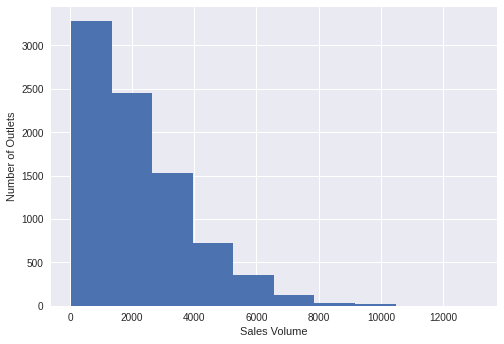

In [23]:
# This Histogram shows the variance of Sales Volume of all the outlets in our dataset 
plt.style.use('seaborn')
df['Item_Outlet_Sales'].hist();
plt.xlabel('Sales Volume')
plt.ylabel('Number of Outlets')

Text(0, 0.5, 'Amount of Items')

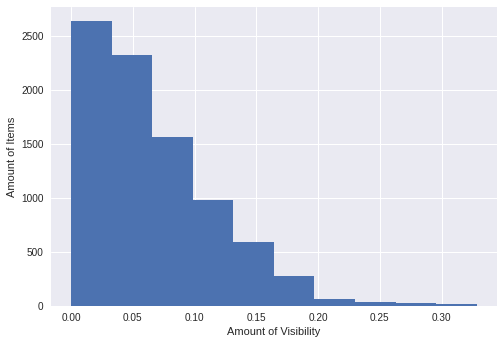

In [24]:
# This histogram shows the variance of visibility for each item in our dataset
plt.style.use('seaborn')
df['Item_Visibility'].hist();
plt.xlabel('Amount of Visibility')
plt.ylabel('Amount of Items')

Text(0, 0.5, 'Amount of Items')

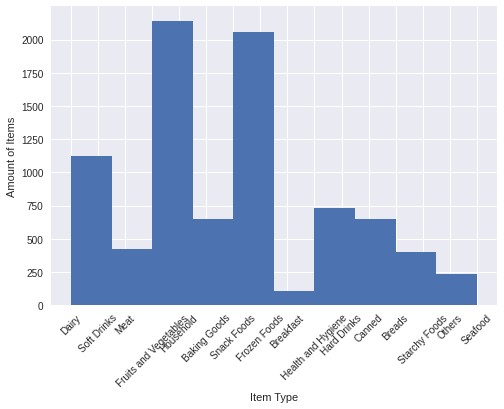

In [25]:
# This Histogram shows how many of each item we have in the dataset
df['Item_Type'].hist()
plt.xticks(rotation = 45)
plt.xlabel('Item Type')
plt.ylabel('Amount of Items')

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015.]),
 <a list of 8 Text major ticklabel objects>)

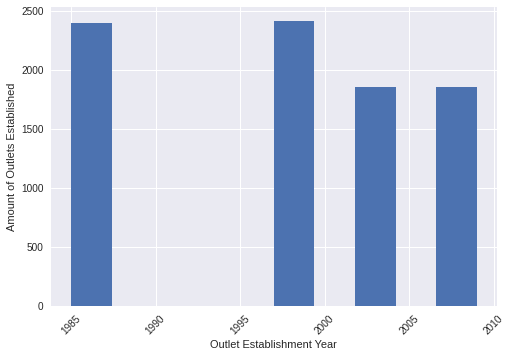

In [26]:
# This histogram shows how many outlets were established each year
df['Outlet_Establishment_Year'].hist()
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Amount of Outlets Established')
plt.xticks(rotation = 45)

Text(0, 0.5, 'Amount of Items')

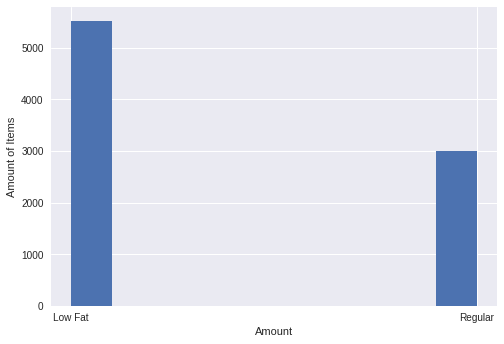

In [27]:
# This histogram shows the amount of Low Fat items compared to Regular Fat items
df['Item_Fat_Content'].hist()
plt.xlabel('Amount')
plt.ylabel('Amount of Items')

Boxplot to view statistical summaries of various features in your dataset.

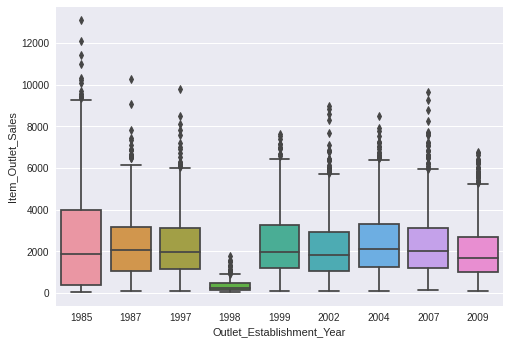

In [28]:
# This Boxplot compares the Sales of each Establishment year
sns.boxplot(x = df['Outlet_Establishment_Year'], y = df['Item_Outlet_Sales'])

This Shows that Outlets established in 1998 have the lowest sales


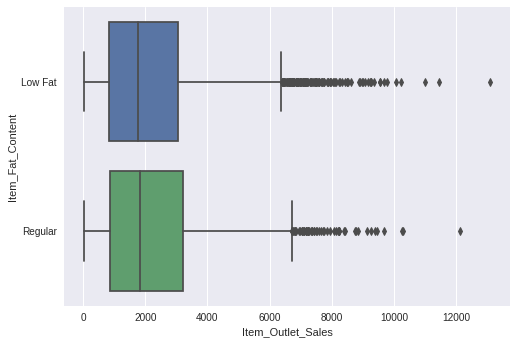

In [29]:
# This boxplot compares the sales of Low Fat vs Regular Fat Content
sns.boxplot(x = df['Item_Outlet_Sales'], y = df['Item_Fat_Content'])

This shows that sales between Low Fat and Regular are very similar

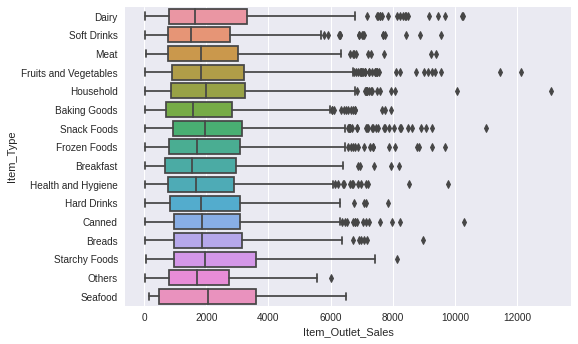

In [30]:
# This Boxplot compares the sales of each item type
sns.boxplot(x = df['Item_Outlet_Sales'], y = df['Item_Type'])

Heatmap of the correlation between features.

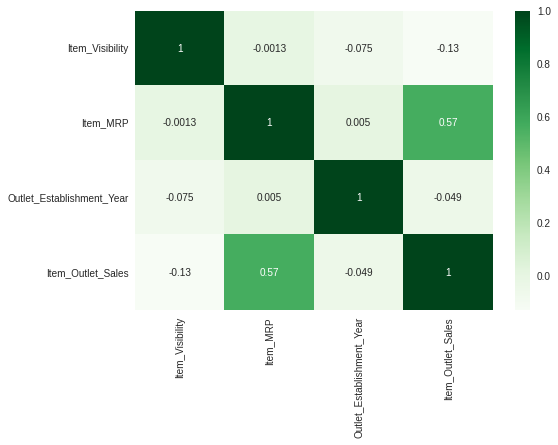

In [31]:
corr = df.corr()
sns.heatmap(corr,cmap='Greens',annot =True)

Looks like there are some correlations between Item MRP and Item Outlet Sales

**Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).**

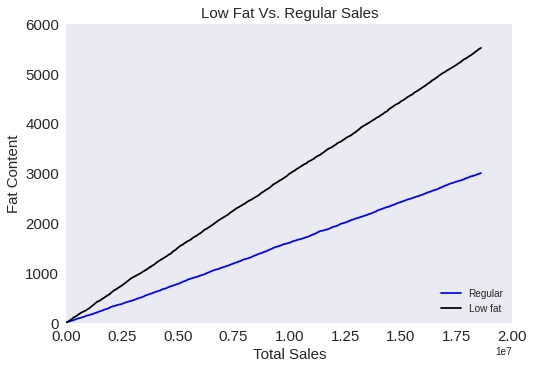

In [32]:
regular = df['Item_Fat_Content'] == 'Regular'
low_fat = df['Item_Fat_Content'] == 'Low Fat'
plt.plot(df['Item_Outlet_Sales'].cumsum(), regular.cumsum(), c = 'b', label  = 'Regular')
plt.plot(df['Item_Outlet_Sales'].cumsum(), low_fat.cumsum(), c = 'k', label ='Low fat')
plt.legend(loc= "lower right")
plt.legend(loc="lower right")
plt.xlim(left=0, right=20000000)
plt.ylim(bottom=0,top=6000)
plt.ylabel('Fat Content', fontsize =15)
plt.xlabel('Total Sales', fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Low Fat Vs. Regular Sales', fontsize =15)
plt.grid()

The Outlets sell more Low Fat items than Regular Fat items

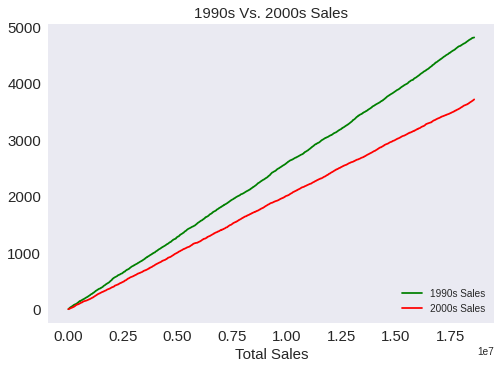

In [33]:
ninties= df['Outlet_Establishment_Year']<2000
thousands= df['Outlet_Establishment_Year']>2000
plt.plot(df['Item_Outlet_Sales'].cumsum(), ninties.cumsum(), c = 'green', label  = '1990s Sales')
plt.plot(df['Item_Outlet_Sales'].cumsum(), thousands.cumsum(), c = 'red', label  = '2000s Sales')
plt.legend(loc= "lower right")
plt.xlabel('Total Sales', fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('1990s Vs. 2000s Sales', fontsize =15)
plt.grid()


The outlets that were established in the 1990's produced more sales than the outlets established in the 2000's

Project 1 - Part 5 (Core)

In [34]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
ohe_df = pd.get_dummies(df, columns = ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type'], drop_first = True)
ohe_df.head()

,Item_Identifier,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,0.016047,249.8092,OUT049,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,DRC01,0.019278,48.2692,OUT018,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,FDN15,0.016760,141.6180,OUT049,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,FDX07,0.000000,182.0950,OUT010,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,NCD19,0.000000,53.8614,OUT013,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


Assign the "Item_Outlet_Sales" column as your target and the rest of the variables as your features matrix.  

In [37]:
X = ohe_df.loc[:,['Item_Fat_Content_Regular', 'Item_Type_Breads','Item_Type_Breakfast','Item_Type_Canned','Item_Type_Dairy','Item_Type_Frozen Foods','Item_Type_Fruits and Vegetables','Item_Type_Hard Drinks','Item_Type_Health and Hygiene','Item_Type_Household','Item_Type_Meat','Item_Type_Others','Item_Type_Seafood','Item_Type_Snack Foods','Item_Type_Soft Drinks','Item_Type_Starchy Foods','Outlet_Establishment_Year_1987','Outlet_Establishment_Year_1997','Outlet_Establishment_Year_1998','Outlet_Establishment_Year_1999','Outlet_Establishment_Year_2002','Outlet_Establishment_Year_2004','Outlet_Establishment_Year_2007','Outlet_Establishment_Year_2009','Outlet_Location_Type_Tier 2','Outlet_Location_Type_Tier 3','Outlet_Type_Supermarket Type1','Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']].values

In [38]:
y = df.loc[:, 'Item_Outlet_Sales'].values

Be sure to train test split your data set!

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Build a linear regression model.

In [40]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Evaluate your test set results using r2.

In [41]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.23837435931629614


In [42]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.2623516948371202


Evaluate your test set results using RMSE

In [43]:
preds = reg.predict(X)
np.sqrt(mean_squared_error(y, preds))

1482.9970682347725